#📌 Extracción

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
df_normalizado = pd.json_normalize(df.to_dict(orient="records"))

df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
Cuentas_Diarias = df_normalizado['account.Charges.Monthly']

Cuentas_Diarias.head()

,account.Charges.Monthly
0,65.6
1,59.9
2,73.9
3,98.0
4,83.9


In [6]:
df_estandarizado = df_normalizado[df_normalizado['Churn'].isin(['Yes', 'No'])]
df_estandarizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [13]:
df_estandarizado = df_estandarizado.replace({'Yes': 1, 'No': 0}).astype('int', errors='ignore')

df_estandarizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerID                 7043 non-null   object
 1   Churn                      7043 non-null   int64 
 2   customer.gender            7043 non-null   object
 3   customer.SeniorCitizen     7043 non-null   int64 
 4   customer.Partner           7043 non-null   int64 
 5   customer.Dependents        7043 non-null   int64 
 6   customer.tenure            7043 non-null   int64 
 7   phone.PhoneService         7043 non-null   int64 
 8   phone.MultipleLines        7043 non-null   object
 9   internet.InternetService   7043 non-null   object
 10  internet.OnlineSecurity    7043 non-null   object
 11  internet.OnlineBackup      7043 non-null   object
 12  internet.DeviceProtection  7043 non-null   object
 13  internet.TechSupport       7043 non-null   object
 14  internet.Stre

/tmp/ipython-input-3919630924.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_estandarizado = df_estandarizado.replace({'Yes': 1, 'No': 0}).astype('int', errors='ignore')


#📊 Carga y análisis

In [14]:
df_estandarizado.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.295897
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.092727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.000000


In [15]:
Churn = df_estandarizado['Churn']

Churn.head()

,Churn
0,0
1,0
2,1
3,1
4,1


In [19]:
Total_churn = len(Churn)
Activos = (Churn == 0).sum()
Bajas = (Churn == 1).sum()

Activos_Porcentaje = (Activos/Total_churn) * 100
Bajas_Porcentaje = (Bajas/Total_churn) * 100

print(Total_churn)
print(Activos, Activos_Porcentaje)
print(Bajas, Bajas_Porcentaje)

7043
5174 73.4630129206304
1869 26.536987079369588


In [20]:
import matplotlib.pyplot as plt

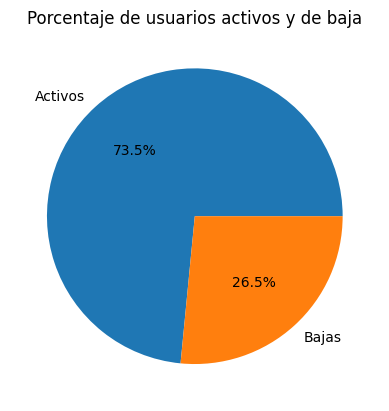

In [25]:
labels = ['Activos', 'Bajas']
sizes = [Activos_Porcentaje, Bajas_Porcentaje]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Porcentaje de usuarios activos y de baja')

plt.show()

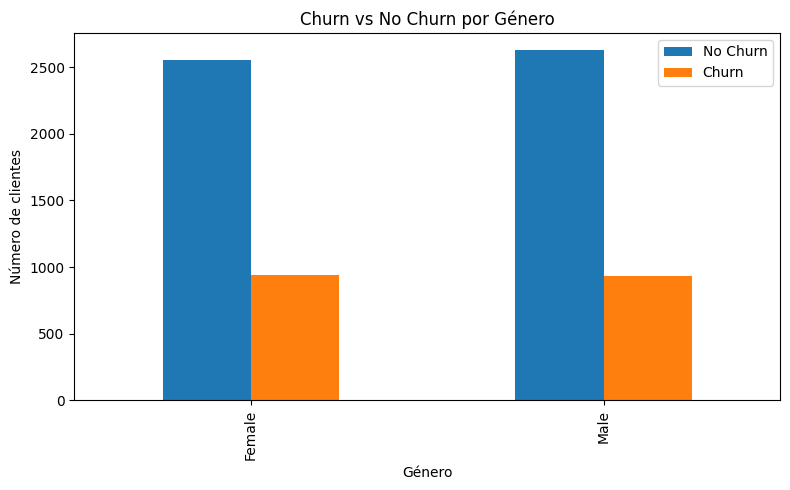

In [26]:
gender_counts = df_estandarizado.groupby(['customer.gender','Churn']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Churn vs No Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

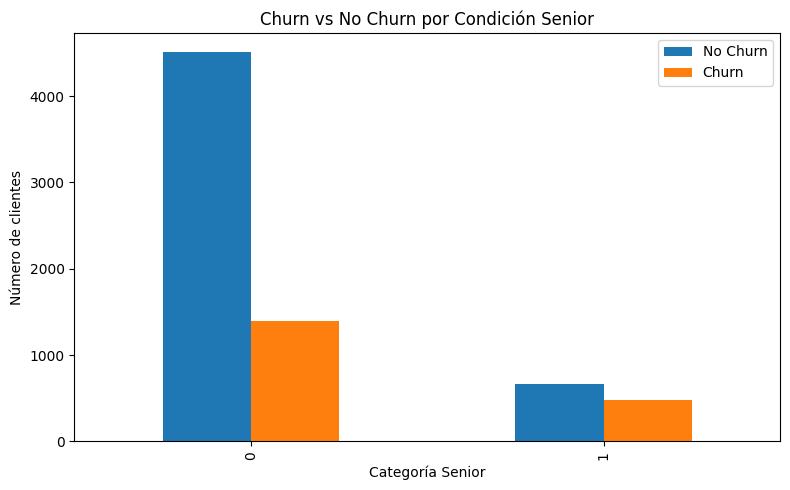

In [34]:
senior_counts = df_estandarizado.groupby(['customer.SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
senior_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Churn vs No Churn por Condición Senior')
plt.xlabel('Categoría Senior')
plt.ylabel('Número de clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

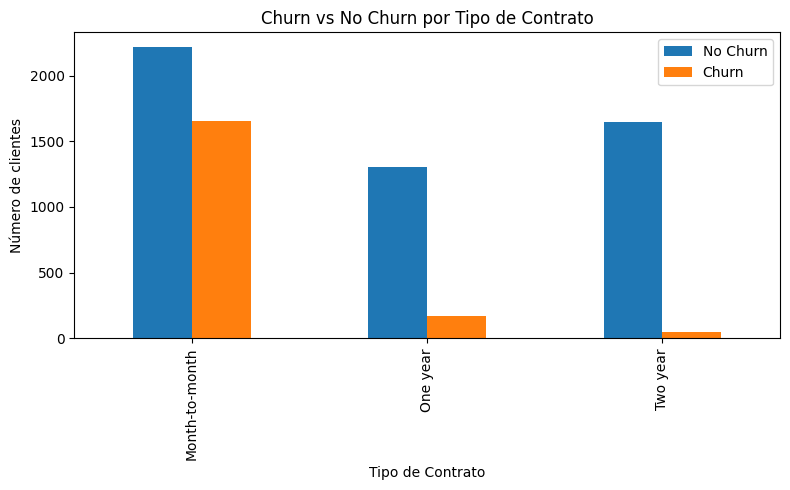

In [38]:
contract_counts = df_estandarizado.groupby(['account.Contract', 'Churn']).size().unstack(fill_value=0)
contract_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Churn vs No Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

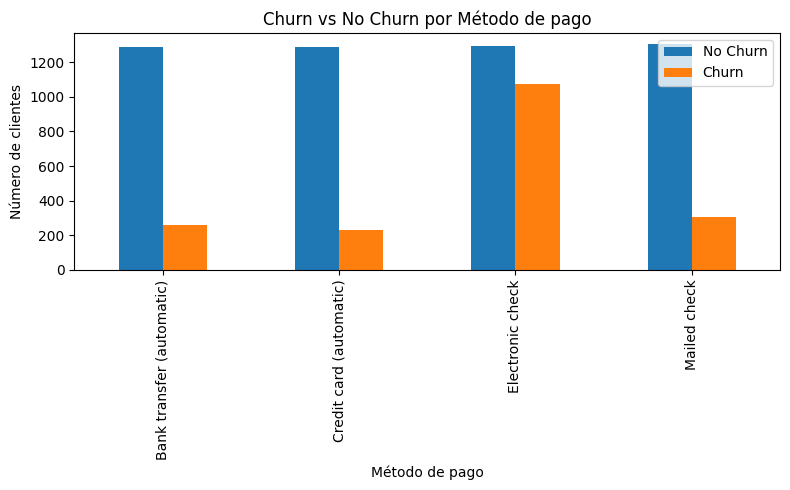

In [39]:
pm_counts = df_estandarizado.groupby(['account.PaymentMethod', 'Churn']).size().unstack(fill_value=0)
pm_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Churn vs No Churn por Método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

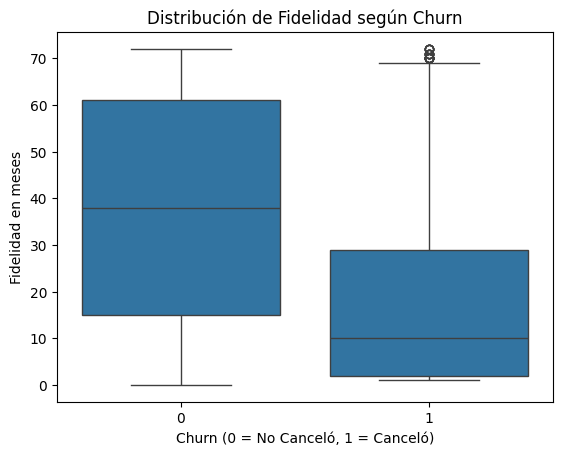

In [43]:
import seaborn as sns

sns.boxplot(x='Churn', y='customer.tenure', data=df_estandarizado)
plt.title('Distribución de Fidelidad según Churn')
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Fidelidad en meses')
plt.show()

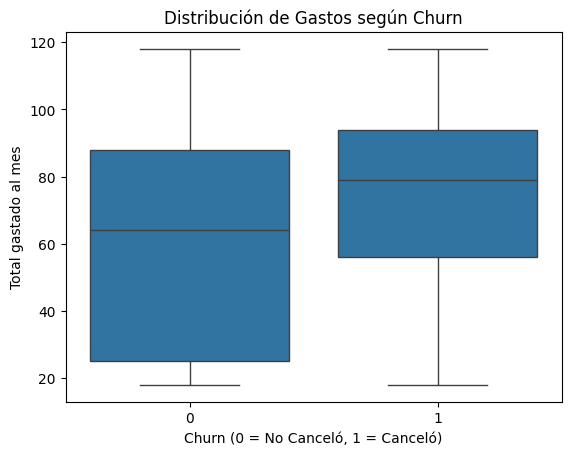

In [45]:
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_estandarizado)
plt.title('Distribución de Gastos según Churn')
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Total gastado al mes')
plt.show()

In [80]:
Gastos_Totales = pd.to_numeric(df_estandarizado['account.Charges.Total'], errors='coerce')

Datos = [Churn, Gastos_Totales]

Gastos = pd.DataFrame(Datos)

Gastos = Gastos.transpose()
Gastos.info()
Gastos.head()



<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7043 non-null   float64
 1   account.Charges.Total  7032 non-null   float64
dtypes: float64(2)
memory usage: 423.1 KB


,Churn,account.Charges.Total
0,0.0,593.30
1,0.0,542.40
2,1.0,280.85
3,1.0,1237.85
4,1.0,267.40


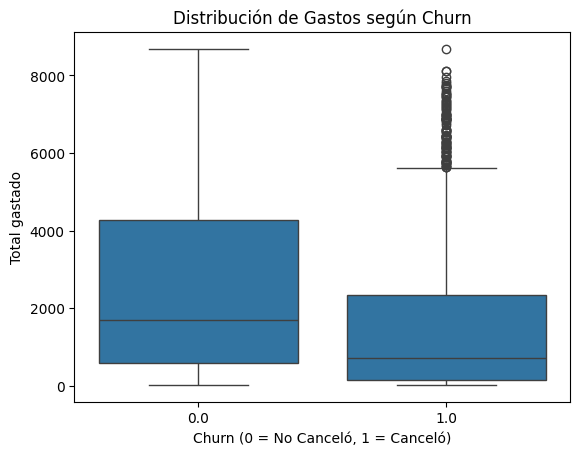

In [81]:
sns.boxplot(x='Churn', y='account.Charges.Total', data=Gastos)
plt.title('Distribución de Gastos según Churn')
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Total gastado')
plt.show()

#📄Informe final

# Introducción

La empresa Telecom X enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El objetivo del proyecto es recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

# Limpieza y tratamiento de datos

El proceso inició con la carga de los datos a partir de un archivo .json. El resultado fue un conjunto de datos con información anidada que dificultaba su análisis por lo que fue necesario normalizar los datos extrayendo la información en columnas que contengan un solo tipo de valor, cambiando valores textuales por valores numéricos para facilitar el análisis y eliminando registros inconsistentes o incompletos.

# Análisis exploratorio de datos

El análisis exploratorio comenzó obteniendo estadísticas descriptivas como la media, la desviación estándar, valores mínimo y máximo y cuartiles.
Después, se realizó un gráfico de pastel que nos ayuda a visualizar rápidamente el porcentaje de usuarios activos y que se han dado de baja (evasión).
Luego, se realizó una serie de gráficos que comparaban la cantidad de usuarios activos con variables categóricas como el género, tipo de contrato, método de pago, etc.
Finalmente, se generó una serie de diagramas de caja para visualizar la distribución de datos numéricos.

#Conclusiones e Insights

* El género no es un factor determinante en la evasión de clientes.
* Los Senior son un grupo demográfico que necesita atención.
* La evasión aumenta en los usuarios con contratos mensuales.
* La evasión aumenta en los usuarios que pagan con cheque electrónico.
* La evasión aumenta en los usuarios con menor antiguedad.
* La evasión aumenta en los usuarios que gastan más al mes.

Estos resultados muestran que existen variables que podrían estar influenciando la evasión entre los clientes de Telecom X.

#Recomendaciones

1. Implementar estrategias para atraer a los Senior. Este grupo demográfico parece ser un área de oportunidad para atraer más clientes.
1. Implementar programas de fidelización. Al dar incentivos para que los usuarios adquieran contratos a largo plazo con menor costo los usuarios tendrán menos tendencia a evadir.
1. Investigar más a fondo la relación entre los cheques electrónicos y la evasión. Es posible que este método de pago sea causa de insatisfacción entre los usuarios.